In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
cars=pd.read_csv(r"C:\Users\vishnuteja\Documents\Cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [2]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info

<bound method DataFrame.info of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [4]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [5]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [7]:
cars.shape

(81, 5)

<Axes: >

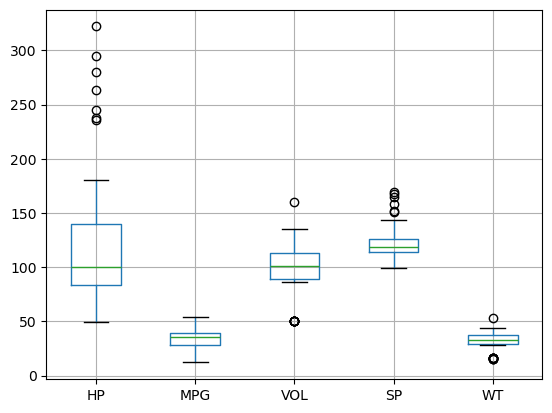

In [8]:
cars.boxplot()

In [9]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


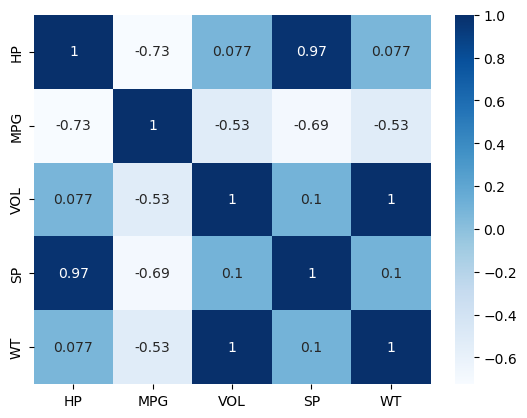

In [10]:
sns.heatmap(cars.corr(),cmap='Blues',annot=True)
plt.show()

In [11]:
sns.scatterplot(x=cars['VOL'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='SP'>

In [12]:
sns.scatterplot(x=cars['VOL'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='SP'>

In [13]:
sns.scatterplot(x=cars['WT'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='SP'>

In [29]:
scatterplot(x=cars['SP'],y=cars['WT'],color='black')

<Axes: xlabel='VOL', ylabel='SP'>

In [33]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','VOL','WT','SP']]=sc.fit_transform(cars[['HP','SP','WT','VOL']])

In [37]:
np.round(cars.describe(),2)

,HP,MPG,VOL,SP,WT
count,81.00,81.00,81.00,81.00,81.00
mean,-0.00,34.42,0.00,0.00,0.00
std,1.01,9.13,1.01,1.01,1.01
min,-1.21,12.10,-1.56,-2.20,-2.24
25%,-0.59,27.86,-0.55,-0.44,-0.38
50%,-0.31,35.15,-0.24,0.10,0.04
75%,0.40,39.53,0.35,0.64,0.67
max,3.60,53.70,3.41,2.76,2.76


In [65]:
mlv=smf.ols('MPG~VOL',data=cars).fit()
mlv.rsquared

0.4721402334141217

In [67]:
mlv.params

Intercept    34.422076
VOL          -6.235589
dtype: float64

In [69]:
mlw=smf.ols('MPG~WT',data=cars).fit()
mlw.rsquared

0.2774751389270127

In [71]:
mlw.params

Intercept    34.422076
WT           -4.780288
dtype: float64

In [73]:
mls=smf.ols('MPG~SP',data=cars).fit()
mls.rsquared

0.2799008651122705

In [75]:
mls.params

Intercept    34.422076
SP           -4.801137
dtype: float64

In [77]:
mlh=smf.ols('MPG~HP',data=cars).fit()
mlh.rsquared

0.5256806086282022

In [79]:
mlh.params

Intercept    34.422076
HP           -6.579653
dtype: float64

In [90]:
model=smf.ols('MPG~VOL+WT+SP+HP',data=cars).fit()

In [92]:
model.rsquared

0.7705372737359844

In [96]:
model.params

Intercept    34.422076
VOL           5.575816
WT            2.982842
SP           -7.448031
HP          -11.660955
dtype: float64